# **Домашнее задание**

Даны два массива с рукописными буквами и с характеристиками вина. 

Выбрать датасет, возможно, предварительно обработать, создать модель, обучить и проверить точность на тестовом датасете. Напишите свои мысли по поводу результатов.

При желании можно рассмотреть оба датасета, можете попробовать применить другие методы машинного обучения, известные вам, и сравнить результаты обучения.

In [395]:
# !pip install tensorflow == 2.7.0

In [396]:
# Импорт библиотек

import numpy as np
from numpy import where
import matplotlib.pyplot as plt
import random as python_random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Normalization
from keras.utils.vis_utils import plot_model
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

print(f'Tensorflow version: {tf.__version__}')

Tensorflow version: 2.8.2


In [397]:
# Вспомогательные функции

# Фиксирование случайных значений
def randomstate(seed=42):
  np.random.seed(seed)
  tf.random.set_seed(seed)

# Построение графика для изображения
def plot_image(i, predictions_array, true_label, img, labels_name):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(labels_name[predicted_label],
                                100*np.max(predictions_array),
                                labels_name[true_label]),
                                color=color)

# Построение графика для визуализации правильных ответов с определенной вероятностью для изображений
def plot_value_array(i, predictions_array, true_label, len_labels):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(len_labels))
  plt.yticks([])
  thisplot = plt.bar(range(len_labels), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# График сравнения распределения классов для датасета с вином
def plot_for_wine(X_test, y_test, y_pred):
  plt.subplot(221)
  for class_value in range(3):
    row_ix = where(y_test == class_value)
    plt.scatter(X_test[row_ix, 0], X_test[row_ix, 1])
  plt.title('Test labels')

  plt.subplot(222)
  for class_value in range(3):
    row_ix = where(y_pred == class_value)
    plt.scatter(X_test[row_ix, 0], X_test[row_ix, 1])
  plt.title('Predict labels')

  plt.show()

# Датасет с винами

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

### **ДАННЫЕ**

In [398]:
data = load_wine()

In [399]:
list(data.target_names)

['class_0', 'class_1', 'class_2']

In [400]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [401]:
data.data.shape, data.target.shape

((178, 13), (178,))

In [402]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25, shuffle=True, random_state=0)

In [403]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133, 13), (45, 13), (133,), (45,))

In [404]:
print(X_train.shape, len(y_train), y_train[:10], sep='\n')

(133, 13)
133
[0 2 1 2 0 2 2 0 2 0]


In [405]:
print(X_test.shape, len(y_test), y_test[:10], sep='\n')

(45, 13)
45
[0 2 1 0 1 1 0 2 1 1]


In [406]:
# Нормализация данных

normalizer = Normalization(axis=-1)
normalizer.adapt(X_train)

normalized_data = normalizer(X_train)
print("var: %.4f" % np.var(normalized_data))
print("mean: %.4f" % np.mean(normalized_data))

var: 1.0000
mean: 0.0000


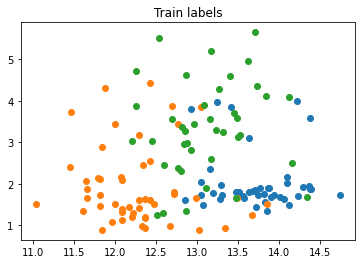

In [407]:
# График распределения классов

for class_value in range(3):
	row_ix = where(y_train == class_value)
	plt.scatter(X_train[row_ix, 0], X_train[row_ix, 1])

plt.title('Train labels')
plt.show()

### **ОБУЧЕНИЕ НЕЙРОННОЙ СЕТИ**

In [408]:
# Создание модели

randomstate()

model_w = keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(13,)),
    keras.layers.Dense(90, activation='tanh'),
    keras.layers.Dense(3)
])

model_w.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])


In [409]:
model_w.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 90)                1260      
                                                                 
 dense_69 (Dense)            (None, 3)                 273       
                                                                 
Total params: 1,533
Trainable params: 1,533
Non-trainable params: 0
_________________________________________________________________


In [410]:
hstr = model_w.fit(X_train, y_train, validation_split=0.2, epochs=7, verbose=2)

Epoch 1/7
4/4 - 0s - loss: 1.2907 - accuracy: 0.3396 - val_loss: 1.2097 - val_accuracy: 0.2963 - 453ms/epoch - 113ms/step
Epoch 2/7
4/4 - 0s - loss: 1.0232 - accuracy: 0.4623 - val_loss: 1.0292 - val_accuracy: 0.4444 - 27ms/epoch - 7ms/step
Epoch 3/7
4/4 - 0s - loss: 0.9146 - accuracy: 0.5849 - val_loss: 0.9457 - val_accuracy: 0.4815 - 24ms/epoch - 6ms/step
Epoch 4/7
4/4 - 0s - loss: 0.8544 - accuracy: 0.7170 - val_loss: 0.9302 - val_accuracy: 0.6667 - 27ms/epoch - 7ms/step
Epoch 5/7
4/4 - 0s - loss: 0.8249 - accuracy: 0.7453 - val_loss: 0.9489 - val_accuracy: 0.6296 - 31ms/epoch - 8ms/step
Epoch 6/7
4/4 - 0s - loss: 0.7849 - accuracy: 0.7170 - val_loss: 0.9093 - val_accuracy: 0.5926 - 31ms/epoch - 8ms/step
Epoch 7/7
4/4 - 0s - loss: 0.7630 - accuracy: 0.7547 - val_loss: 0.8415 - val_accuracy: 0.6296 - 29ms/epoch - 7ms/step


### **ОЦЕНКА**

In [411]:
# Оценка модели на тесте

model_w.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.6967 - accuracy: 0.8222


[0.6966922283172607, 0.8222222328186035]

### **ПРЕДСКАЗАНИЯ**

In [412]:
probability_model = tf.keras.Sequential([model_w, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)

In [413]:
print(predictions[0],
      np.argmax(predictions[0]),
      y_test[0],
      sep='\n')

[0.5474023  0.2936804  0.15891728]
0
0


In [414]:
y_pred = np.array([np.argmax(predictions[i]) for i in range(predictions.shape[0])])

### **ВИЗУАЛИЗАЦИЯ**

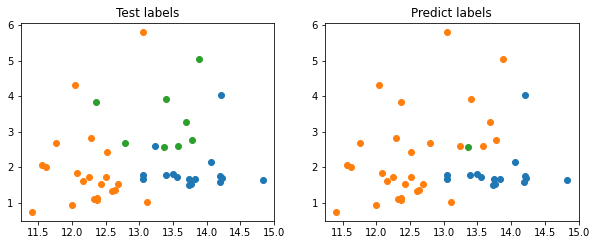

In [415]:
# График распределения классов на реальных ответах и предсказаниях

plt.figure(figsize=(10, 8))
plot_for_wine(X_test, y_test, y_pred)

### **ОБУЧЕНИЕ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ**

In [416]:
# Создание модели

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

1.0

In [417]:
# Предсказание ответов

y_pred = pipe.predict(X_test)

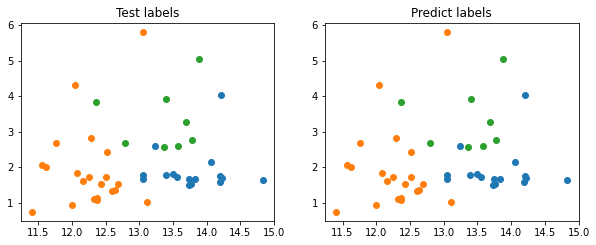

In [418]:
# График распределения классов на реальных ответах и предсказаниях

plt.figure(figsize=(10, 8))
plot_for_wine(X_test, y_test, y_pred)

### **ВЫВОД**

С помощью нейронной сети удалось добиться точности на тесте в **0.8222**. При этом на трейне точность была ниже - **0.7547**.

Предсказания с помощью логистической регрессии оказались лучше и показали 100% результат.

# Датасет с рукописными буквами

https://www.tensorflow.org/datasets/catalog/binary_alpha_digits

### **ДАННЫЕ**

In [419]:
# Загрузка данных

X = np.load('/content/drive/MyDrive/Colab Notebooks/Нейронные сети/binary_alpha_digits_images.npy')
y = np.load('/content/drive/MyDrive/Colab Notebooks/Нейронные сети/binary_alpha_digits_labels.npy')

# Выделение названий классов

classes = [str(i) for i in range(10)] +  list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
print(classes)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [420]:
len(classes)

36

In [421]:
X.shape, y.shape

((1404, 20, 16), (1404,))

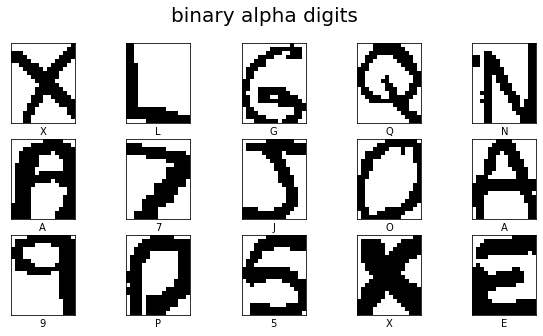

In [422]:
# Визуализация изображений

fig, axes = plt.subplots(3, 5, figsize=(10, 5))
fig.suptitle('binary alpha digits', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(X[n], cmap=plt.cm.binary)
    ax.set_xlabel(classes[y[n]])
    n += 1

In [423]:
# Деление на тренировочную и тестовую выборки

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

In [424]:
# Нормализация данных

X_train = X_train / 255.0
X_test = X_test / 255.0

In [425]:
print(X_train.shape, len(y_train), [classes[i] for i in y_train[:10]], sep='\n')

(940, 20, 16)
940
['C', 'Y', 'Y', 'G', 'V', '2', '6', 'T', 'O', 'G']


In [426]:
print(X_test.shape, len(y_test), [classes[i] for i in y_test[:10]], sep='\n')

(464, 20, 16)
464
['D', 'S', '4', 'A', 'V', 'O', 'G', 'L', 'V', '2']


### **ОБУЧЕНИЕ НЕЙРОННОЙ СЕТИ**

In [427]:
# Создание модели

randomstate()

model_rb = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 16)),
    keras.layers.Dense(250, activation='tanh'),
    keras.layers.Dense(200, activation='tanh'),
    keras.layers.Dense(150, activation='tanh'),
    keras.layers.Dense(36)
])

model_rb.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])


In [428]:
model_rb.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 320)               0         
                                                                 
 dense_70 (Dense)            (None, 250)               80250     
                                                                 
 dense_71 (Dense)            (None, 200)               50200     
                                                                 
 dense_72 (Dense)            (None, 150)               30150     
                                                                 
 dense_73 (Dense)            (None, 36)                5436      
                                                                 
Total params: 166,036
Trainable params: 166,036
Non-trainable params: 0
_________________________________________________________________


In [429]:
hstr = model_rb.fit(X_train, y_train, validation_split=0.2, epochs=15, verbose=2)

Epoch 1/15
24/24 - 1s - loss: 3.5186 - accuracy: 0.0585 - val_loss: 3.3265 - val_accuracy: 0.0851 - 608ms/epoch - 25ms/step
Epoch 2/15
24/24 - 0s - loss: 2.6306 - accuracy: 0.2128 - val_loss: 2.3368 - val_accuracy: 0.2713 - 99ms/epoch - 4ms/step
Epoch 3/15
24/24 - 0s - loss: 1.7666 - accuracy: 0.4269 - val_loss: 2.2328 - val_accuracy: 0.3457 - 88ms/epoch - 4ms/step
Epoch 4/15
24/24 - 0s - loss: 1.4450 - accuracy: 0.5173 - val_loss: 1.8980 - val_accuracy: 0.4309 - 96ms/epoch - 4ms/step
Epoch 5/15
24/24 - 0s - loss: 1.1840 - accuracy: 0.6117 - val_loss: 1.7302 - val_accuracy: 0.4894 - 106ms/epoch - 4ms/step
Epoch 6/15
24/24 - 0s - loss: 0.9744 - accuracy: 0.6729 - val_loss: 1.5855 - val_accuracy: 0.5372 - 96ms/epoch - 4ms/step
Epoch 7/15
24/24 - 0s - loss: 0.8502 - accuracy: 0.7287 - val_loss: 1.4781 - val_accuracy: 0.5532 - 93ms/epoch - 4ms/step
Epoch 8/15
24/24 - 0s - loss: 0.7633 - accuracy: 0.7314 - val_loss: 1.5807 - val_accuracy: 0.5426 - 91ms/epoch - 4ms/step
Epoch 9/15
24/24 - 0s

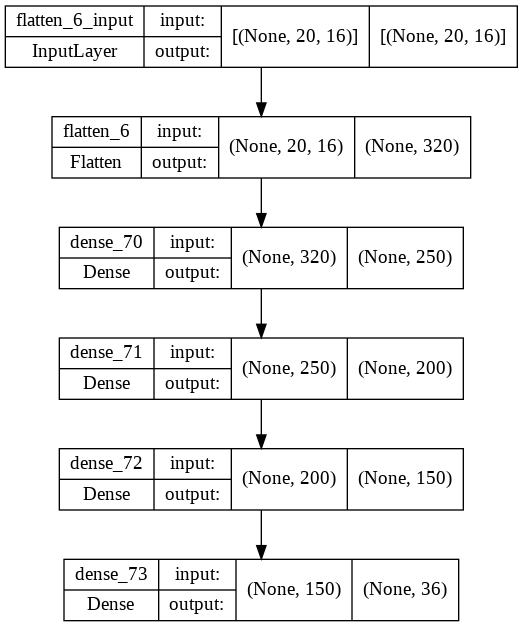

In [430]:
plot_model(model_rb, show_shapes=True, show_layer_names=True)

### **ОЦЕНКА КАЧЕСТВА**

In [431]:
# Оценка модели на тесте

model_rb.evaluate(X_test, y_test)

15/15 [==============================] - 0s 2ms/step - loss: 1.5832 - accuracy: 0.5905


[1.5832096338272095, 0.5905172228813171]

### **РЕЗУЛЬТАТЫ**

In [432]:
probability_model = tf.keras.Sequential([model_rb, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)

In [433]:
print(predictions[0],
      np.argmax(predictions[0]),
      y_test[0],
      sep='\n')

[8.1234276e-02 5.8665024e-09 1.6306436e-07 1.3357857e-05 4.0168288e-05
 4.2211362e-08 4.8095603e-03 7.3376833e-07 4.8263905e-07 9.0889089e-06
 6.1595342e-03 1.7112730e-02 7.1492739e-04 4.9769670e-01 4.0064145e-07
 1.7083183e-05 4.7901831e-05 9.2391291e-04 4.5512940e-09 2.5996985e-06
 1.2756807e-07 1.0039803e-05 3.0068852e-04 7.6384031e-06 9.2863813e-02
 2.9707125e-01 2.4240767e-04 9.6572012e-06 6.2968832e-07 2.2521826e-08
 6.8414403e-04 4.8195943e-06 1.5180729e-05 3.5279568e-10 3.9985878e-08
 5.9131044e-06]
13
13


### **ВИЗУАЛИЗАЦИЯ**

(20, 16)
(1, 20, 16)
[[4.66589292e-08 2.01626463e-05 4.25586586e-06 1.75539259e-04
  9.48878309e-08 7.68295884e-01 2.05149817e-08 7.98444475e-08
  3.93562746e-04 4.18368791e-06 5.06292395e-08 1.42627498e-04
  4.38495448e-07 1.20488778e-07 1.02054283e-01 1.09068467e-03
  2.69894026e-05 1.99121164e-08 1.92907557e-03 1.49546063e-03
  4.49072113e-09 1.81279756e-08 7.04642117e-12 2.42868670e-10
  7.08991479e-08 9.13475873e-09 7.69091855e-07 5.78335005e-07
  1.23379625e-01 9.64375446e-04 2.69318812e-09 8.68241656e-09
  1.20421034e-10 4.71587754e-07 8.53767279e-09 2.06002769e-05]]


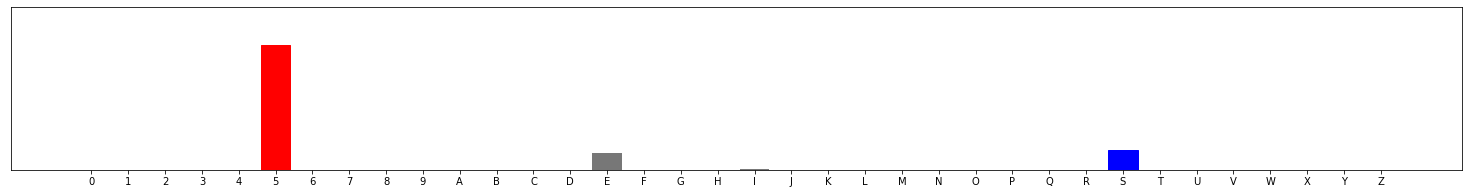

In [434]:
plt.figure(figsize=(26,3))
img = X_test[1]

print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))

print(img.shape)
predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], y_test, len(classes))
_ = plt.xticks(range(36), classes, rotation=0)

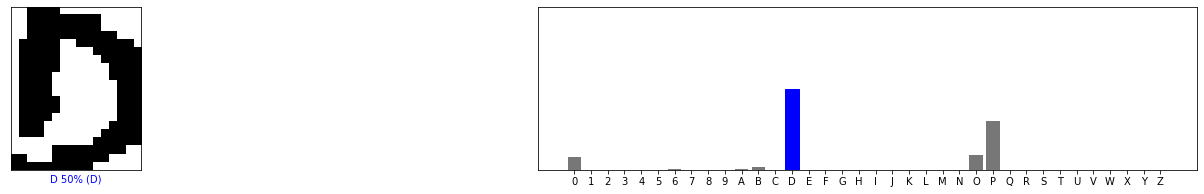

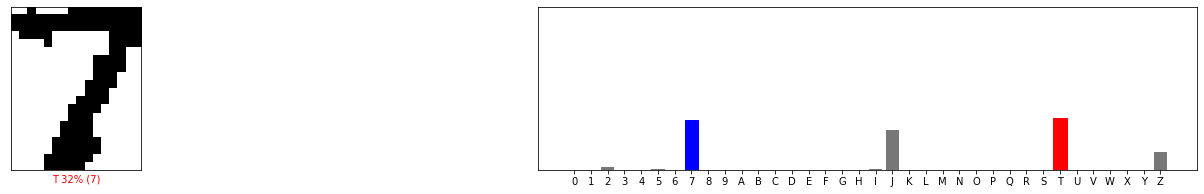

In [435]:
i = 0
plt.figure(figsize=(26,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test, classes)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test, len(classes))
_ = plt.xticks(range(36), classes, rotation=0)
plt.show()

i = 12
plt.figure(figsize=(26,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test, classes)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test, len(classes))
_ = plt.xticks(range(36), classes, rotation=0)
plt.show()


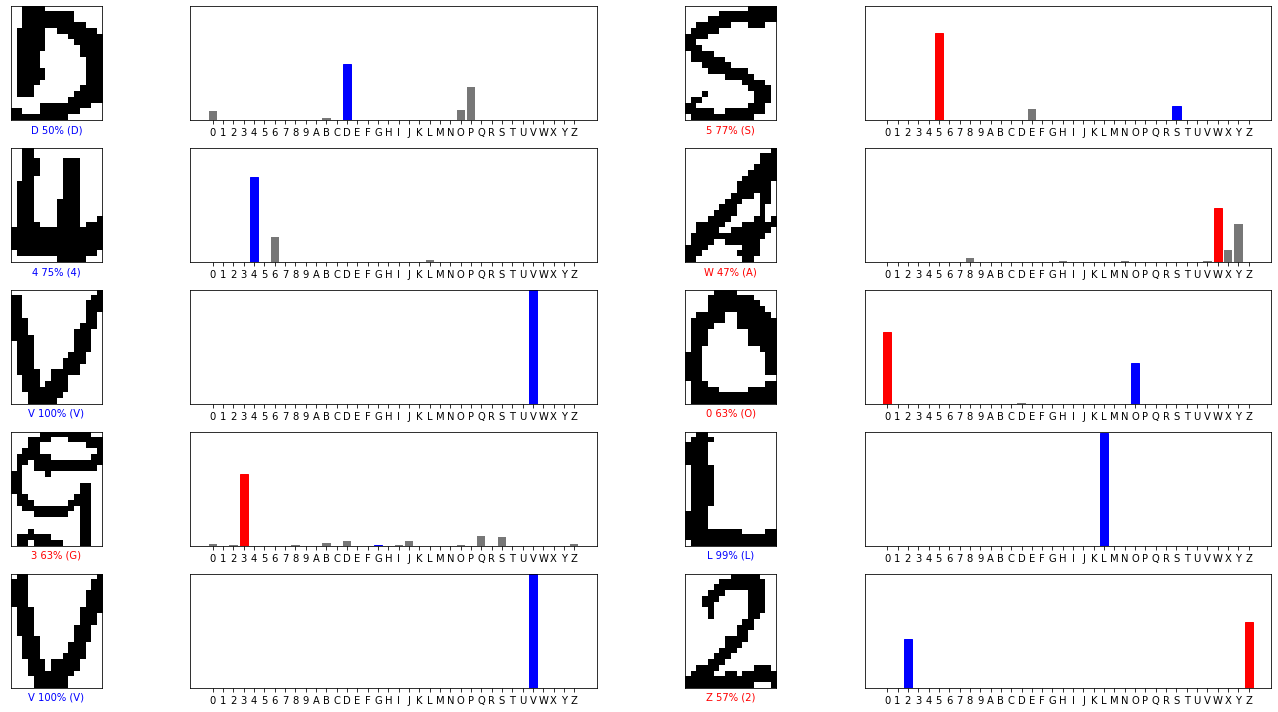

In [436]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*5*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test, classes)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)  
  plot_value_array(i, predictions[i], y_test, len(classes))
  _ = plt.xticks(range(36), classes, rotation=0) 

plt.tight_layout()

plt.show()

### **ВЫВОД**

С помощью нейронной сети удалось добиться точности на тесте в **0.5905**. На трейне точность составила **0.8644**. Вероятно, есть момент переобучения, так как разрыв довольно большой между значениями на трейне и тесте.